In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.externals import joblib #for saving model
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
#importing keras library for CNN
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,MaxPool2D,AvgPool2D,Flatten,Conv2D,Activation
from keras.callbacks import ModelCheckpoint

E:\progammefiles\python\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Data PreProcessing and understading

** Add four images into particular directories like below into train and test **

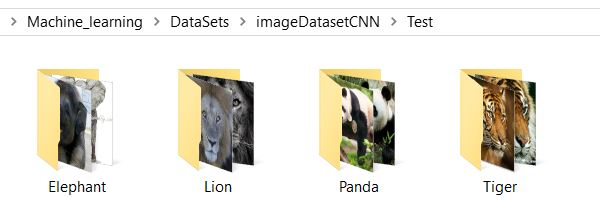

In [8]:
from IPython.display import Image
image=Image('Capture2.JPG')
image

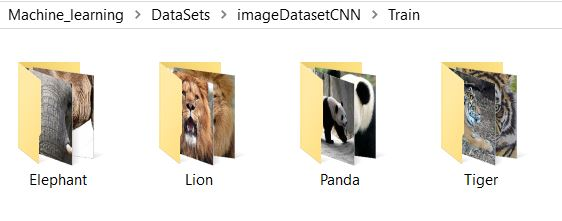

In [9]:
image=Image('Capture.JPG')
image

In [3]:
def dict_names(a):
    if a==0:
        return 'Elephant'
    
    elif a==1:
        return 'Lion'
    
    elif a==2:
        return 'Panda'
    
    else :
        return 'Tiger'

In [4]:
train=ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True #all this features adding to noise to the image
                             )

test=ImageDataGenerator(rescale=1./255)

In [5]:
train_data=train.flow_from_directory('E:/Machine_learning/DataSets/imageDatasetCNN/Train',
                                    target_size=(128,128),batch_size=16,
                                    class_mode='categorical')
test_data=train.flow_from_directory('E:/Machine_learning/DataSets/imageDatasetCNN/Test',
                                    target_size=(128,128),batch_size=40,
                                    class_mode='categorical')

Found 498 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


***The above code classifies the each folder into a single class, the objects from each folder will come under that particular class ***

**This objects will have the batch data**

In [6]:
x,y=train_data.next()
x.shape

(16, 128, 128, 3)

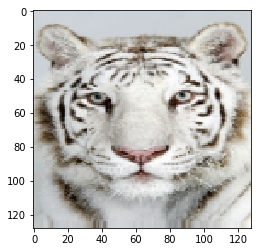

In [7]:
plt.imshow(x[0])

In [8]:
y[0]

array([0., 0., 0., 1.], dtype=float32)

This will give the into how many batches data is divided: 32
first batch data X shape (16, 128, 128, 3)
first batch data y shape: (16, 4)
first batch data first image X shape: (128, 128, 3)
first batch data first image y shape: (4,)
first batch data first image X AxesImage(54,36;334.8x217.44)
first batch data first image y [0. 0. 0. 1.]


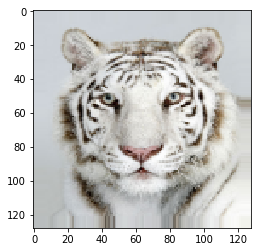

In [9]:
print('This will give the into how many batches data is divided:',len(train_data))
print('first batch data X shape',train_data[0][0].shape)
print('first batch data y shape:',train_data[0][1].shape)
print('first batch data first image X shape:',train_data[0][0][1].shape)
print('first batch data first image y shape:',train_data[0][1][0].shape)
print('first batch data first image X',plt.imshow(train_data[0][0][0]))
print('first batch data first image y',train_data[0][1][0])

# Creating CNN model

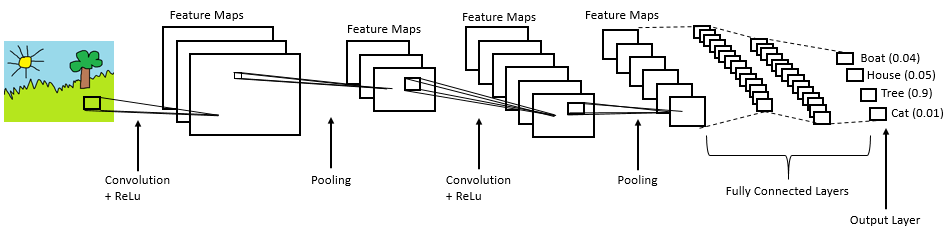

In [10]:
image=Image('CNN.png')
image

In [10]:
checkpoint = ModelCheckpoint('E:/Machine_learning/savingModel/CNN_keras/weights-{epoch:02d}-{val_acc:.2f}.hdf5', monitor='val_acc',\
                             verbose=1,  mode='max')
callbacks_list = [checkpoint]

**The above call will be used as check points, usefully to recall model if it fails**

In [11]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128, 128, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(AvgPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
h=model.fit_generator(train_data,epochs=15,validation_data=test_data,callbacks=callbacks_list)

Epoch 1/15
17/32 [==============>...............] - ETA: 27s - loss: 1.5182 - acc: 0.3897

E:\progammefiles\python\anaconda\lib\site-packages\PIL\Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


32/32 [==============================] - 54s 2s/step - loss: 1.3123 - acc: 0.4687 - val_loss: 1.2413 - val_acc: 0.5000

Epoch 00001: saving model to E:/Machine_learning/savingModel/CNN_keras/weights-01-0.50.hdf5
Epoch 2/15
32/32 [==============================] - 41s 1s/step - loss: 0.8653 - acc: 0.6388 - val_loss: 1.1521 - val_acc: 0.4750

Epoch 00002: saving model to E:/Machine_learning/savingModel/CNN_keras/weights-02-0.47.hdf5
Epoch 3/15
32/32 [==============================] - 40s 1s/step - loss: 0.7043 - acc: 0.7443 - val_loss: 0.9054 - val_acc: 0.6000

Epoch 00003: saving model to E:/Machine_learning/savingModel/CNN_keras/weights-03-0.60.hdf5
Epoch 4/15
32/32 [==============================] - 40s 1s/step - loss: 0.6204 - acc: 0.7615 - val_loss: 0.7679 - val_acc: 0.7000

Epoch 00004: saving model to E:/Machine_learning/savingModel/CNN_keras/weights-04-0.70.hdf5
Epoch 5/15
32/32 [==============================] - 46s 1s/step - loss: 0.4390 - acc: 0.8593 - val_loss: 0.6571 - val_a

In [13]:
perf_dict=h.history

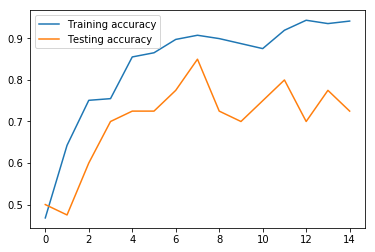

In [14]:
plt.plot(perf_dict['acc'],label='Training accuracy')
plt.plot(perf_dict['val_acc'],label='Testing accuracy')
plt.legend(loc='best')

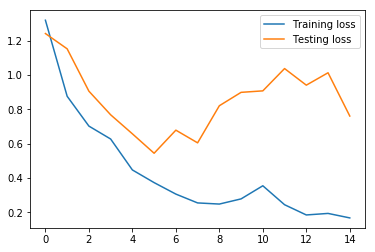

In [15]:
plt.plot(perf_dict['loss'],label='Training loss')
plt.plot(perf_dict['val_loss'],label='Testing loss')
plt.legend(loc='best')

**From above graphs we can conculde that the model is oferfitted, best fit occur at nearly 8th epochs, so we can recall model at 8th epochs**

In [17]:
_,acc=model.evaluate_generator(test_data)
print('accuracy score:',acc)

accuracy score: 0.7749999761581421


In [22]:
#Recallin model for 8th epohs
model.load_weights("E:/Machine_learning/savingModel/CNN_keras/weights-08-0.85.hdf5")
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
_,acc=model.evaluate_generator(test_data)
print('accuracy score:',acc)

accuracy score: 0.8500000238418579


**The accuracy is good **

# Predictions

image Predication: Elephant
image Predication: [0]
image probablites: [[8.1807739e-01 3.4024410e-02 4.6110002e-04 1.4743713e-01]]
image true label: Elephant


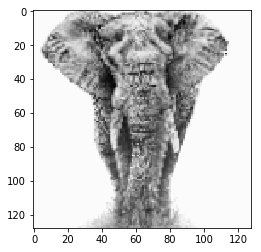

In [26]:
img,label=test_data.next()
img_pred=model.predict_classes(img[0].reshape(-1,128,128,3))
img_prob=model.predict(img[0].reshape(-1,128,128,3))
print('image Predication:',dict_names(int(img_pred)))
print('image Predication:',img_pred)
print('image probablites:',img_prob)
print('image true label:',dict_names(np.argmax(label[0])))
plt.imshow(img[0])

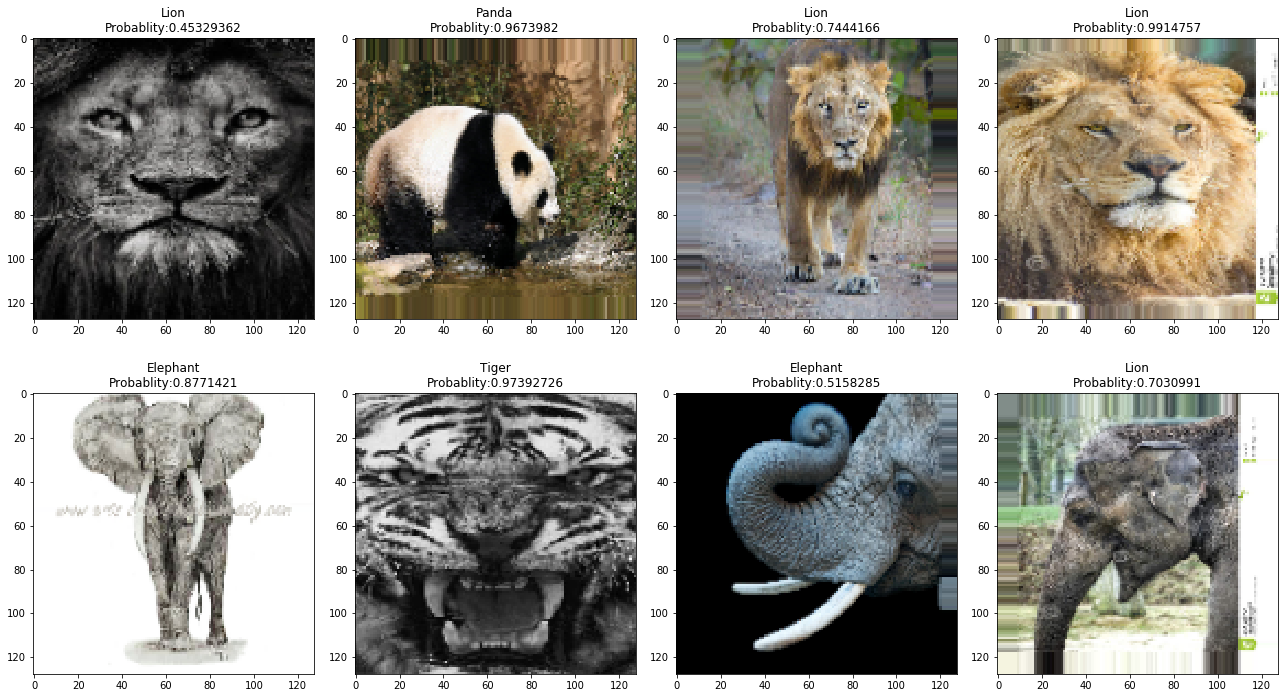

In [27]:
plt.figure(figsize=(18,10))
img,label=test_data.next()
for i in range(0,8):
    plt.subplot(2,4,i+1)
    image_value=img[i].reshape(-1,128,128,3)
    pred_value=model.predict_classes(image_value)
    pred_prob=model.predict(image_value)
    plt.imshow(img[i])
    label=str(dict_names(pred_value))+'\n'+'Probablity:'+str(pred_prob[0][int(pred_value)])
    plt.title(label)
plt.tight_layout()

# Results are Pretty good